## K-means( random initialization)

In [1]:
import numpy as np
import math

# % Standard K-means clustering
# % Inputs: data, n*d data matrix with n instances and d features
# %         K, number of clusters
# % Ouputs: labels, n*1 indicator matrix with elements from 1 to K
# %         centroids, K*d centroid matrix
# %         objV, objective function value of K-means
# % Jie TANG by 04/20/2020 jietang@brandeis.edu

def myKmeans(data, K, Maxiter=50, ObjV =math.inf, threshold = 0.01, centroids = False):
    centroids = initializeCentroid(data, K)
    for i in range(Maxiter):
        labels, New_ObjV = assign_label(data, centroids)
        centroids = update_centroid(data, K, labels)
        if ObjV-New_ObjV > threshold:
            ObjV = New_ObjV
    return labels, centroids, ObjV

## initialize k centroids randomly
def initializeCentroid(data, K):
    return data[np.random.choice(len(data), K, replace=False)]
   
## assign labels to each point
def assign_label(data, centroids):
     return np.array([np.argmin(np.sqrt(np.sum((data[i]-centroids)**2, axis=1))) for i in range(len(data))]),\
    np.sum([np.sum((data[i]-centroids)**2) for i in range(len(data))])

## update the centroids
def update_centroid(data, K, labels):
    return np.array([np.mean(data[labels==k], axis=0) for k in range(K)])

## Testing

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

iris = datasets.load_iris()
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [7]:
labels, centroids, ObjV = myKmeans(iris.data, 3)

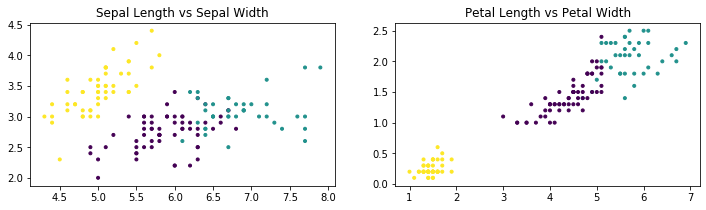

In [33]:
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.scatter(iris.data[:, 0], iris.data[:, 1], marker='.', c = labels)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(iris.data[:, 2], iris.data[:, 3], marker='.', c = labels)
plt.title('Petal Length vs Petal Width')
plt.show()

In [36]:
from sklearn.metrics.cluster import normalized_mutual_info_score

normalized_mutual_info_score(labels, iris.target)

0.7419116631817836

The NMI is about 0.742, which is fine.

## KNN

In [38]:
# Example of calculating Euclidean distance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors


# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

### data handling

In [66]:
iris_data = iris.data
iris_target = iris.target.reshape(150,1)
iris_all = np.hstack((iris_data,iris_target))

### prediction

In [74]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_all)
predictions = k_nearest_neighbors(train, test,3)

### evaluating

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, test[:, -1])

0.9473684210526315

The accuracy is about 95%, which is quite high!